In [2]:
import pandas as pd
import numpy as np
import sklearn

In [3]:
wifi = pd.read_csv("/Users/abhayranjan/training/USL- Demo Content/wifi_data.csv")
wifi.head(n=5)

,OBJECTID,Borough,Type,Provider,Latitude,Longitude,Location_T,City,BoroCode,NTACode
0,998,MN,Free,LinkNYC - Citybridge,40.745968,-73.994039,Outdoor Kiosk,New York,1,MN17
1,999,MN,Free,LinkNYC - Citybridge,40.744614,-73.985069,Outdoor Kiosk,New York,1,MN17
2,1000,MN,Free,LinkNYC - Citybridge,40.757666,-73.985878,Outdoor Kiosk,New York,1,MN17
3,1001,MN,Free,LinkNYC - Citybridge,40.759971,-73.984342,Outdoor Kiosk,New York,1,MN17
4,1002,MN,Free,LinkNYC - Citybridge,40.760413,-73.984541,Outdoor Kiosk,New York,1,MN17


In [4]:
wifi.shape

(2566, 10)

In [5]:
wifi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566 entries, 0 to 2565
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    2566 non-null   int64  
 1   Borough     2566 non-null   object 
 2   Type        2566 non-null   object 
 3   Provider    2566 non-null   object 
 4   Latitude    2566 non-null   float64
 5   Longitude   2566 non-null   float64
 6   Location_T  2566 non-null   object 
 7   City        2566 non-null   object 
 8   BoroCode    2566 non-null   int64  
 9   NTACode     2566 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 200.6+ KB


In [6]:
wifi.columns

Index(['OBJECTID', 'Borough', 'Type', 'Provider', 'Latitude', 'Longitude',
       'Location_T', 'City', 'BoroCode', 'NTACode'],
      dtype='object')

In [8]:
#Identify Feature Types
wifi.dtypes

OBJECTID        int64
Borough        object
Type           object
Provider       object
Latitude      float64
Longitude     float64
Location_T     object
City           object
BoroCode        int64
NTACode        object
dtype: object

In [15]:
print(wifi.Borough.value_counts())
print(wifi.Type.value_counts())
print(wifi.Provider.value_counts())
print(wifi.Location_T.value_counts())
print(wifi.City.value_counts())
print(wifi.BoroCode.value_counts())
print(wifi.NTACode.value_counts())

MN    1204
BK     595
QU     415
BX     257
SI      95
Name: Borough, dtype: int64
Free            1983
Limited Free     581
Partner Site       2
Name: Type, dtype: int64
LinkNYC - Citybridge       1134
SPECTRUM                    343
Transit Wireless            276
ALTICEUSA                   237
Harlem                      128
Downtown Brooklyn           100
NYPL                         90
QPL                          65
BPL                          59
Manhattan Down Alliance      36
Chelsea                      30
NYCHA                        28
AT&T                         27
City Tech                    11
Partner                       2
Name: Provider, dtype: int64
Outdoor Kiosk         1134
Outdoor                696
Subway Station         276
Library                214
Indoor                 125
Outdoor TWC Aerial     121
Name: Location_T, dtype: int64
New York            1204
Brooklyn             595
Queens               350
Bronx                257
Staten Island         95
Fl

In [20]:
print(wifi.shape)
print(wifi.BoroCode.unique())
print(wifi.NTACode.unique())

(2566, 10)
[1, 3, 2, 4, 5]
Categories (5, int64): [1, 3, 2, 4, 5]
['MN17', 'MN20', 'MN13', 'MN21', 'MN19', ..., 'QN08', 'QN50', 'BK96', 'SI01', 'BX06']
Length: 178
Categories (178, object): ['MN17', 'MN20', 'MN13', 'MN21', ..., 'QN50', 'BK96', 'SI01', 'BX06']


In [16]:
print(wifi.dtypes)
to_convert = ['Borough','Type','Provider','Location_T','City','BoroCode','NTACode']
wifi[to_convert] = wifi[to_convert].astype('category')
print(wifi.dtypes)

OBJECTID        int64
Borough        object
Type           object
Provider       object
Latitude      float64
Longitude     float64
Location_T     object
City           object
BoroCode        int64
NTACode        object
dtype: object
OBJECTID         int64
Borough       category
Type          category
Provider      category
Latitude       float64
Longitude      float64
Location_T    category
City          category
BoroCode      category
NTACode       category
dtype: object


<AxesSubplot:>

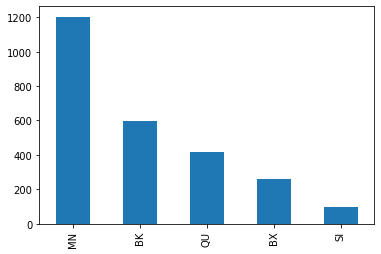

In [22]:
wifi.Borough.value_counts().plot.bar()
wifi.

<AxesSubplot:>

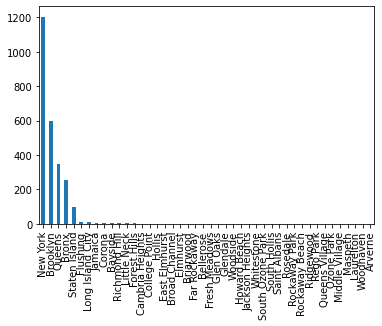

In [23]:
wifi.City.value_counts().plot.bar()

In [25]:
import folium
display = folium.Map(location=[40,-74])
for (_,(lat,long)) in wifi[['Latitude','Longitude']].iterrows():
    folium.CircleMarker([lat,long],radius=5,color='#3186cc',fill_color='#3186cc').add_to(display)
    
display


In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8,random_state=0).fit(wifi[['Latitude','Longitude']].values)
labels = kmeans.labels_
colors = ['#9400D3','#4B0082','#0000FF','#00FF00','#FFFF00','#FF7F00','#FF0000','#000000','#66c2a5']

## Violet:#9400D3,Indigo:#4B0082,Blue:#0000FF,Green:#00FF00,Yellow:#FFFF00,Orange:#FF7F00,Red:#FF0000
display = folium.Map(location=[40,-74])
for (lat,long,label) in zip(wifi['Latitude'],wifi['Longitude'],labels):
    folium.CircleMarker([lat,long],radius=5,color=colors[label],fill_color=colors[label]).add_to(display)
display

In [30]:
len(labels)

2566

In [33]:
#Which provider has the highest number of wifi spots
wifi.Provider.value_counts()
#LinkNYC - Citybridge has the highes number of wifi spots

LinkNYC - Citybridge       1134
SPECTRUM                    343
Transit Wireless            276
ALTICEUSA                   237
Harlem                      128
Downtown Brooklyn           100
NYPL                         90
QPL                          65
BPL                          59
Manhattan Down Alliance      36
Chelsea                      30
NYCHA                        28
AT&T                         27
City Tech                    11
Partner                       2
Name: Provider, dtype: int64

In [48]:
#Which Provider has the highest number of free wifi spots
print(wifi.columns)
print(wifi.Type.value_counts())
free_wifi = wifi[wifi['Type']=='Free']
print(free_wifi.shape)
print(free_wifi.Provider.value_counts())

Index(['OBJECTID', 'Borough', 'Type', 'Provider', 'Latitude', 'Longitude',
       'Location_T', 'City', 'BoroCode', 'NTACode'],
      dtype='object')
Free            1983
Limited Free     581
Partner Site       2
Name: Type, dtype: int64
(1983, 10)
LinkNYC - Citybridge       1134
Transit Wireless            276
Harlem                      128
Downtown Brooklyn           100
NYPL                         90
QPL                          65
BPL                          59
Manhattan Down Alliance      36
Chelsea                      30
NYCHA                        28
AT&T                         26
City Tech                    11
SPECTRUM                      0
Partner                       0
ALTICEUSA                     0
Name: Provider, dtype: int64


In [51]:
#List down the name of the provide that provide 'Limited Free' wifi
print(wifi.Type.value_counts())
limited_free_wifi = wifi[wifi['Type']=='Limited Free']
limited_free_wifi.Provider.value_counts()

Free            1983
Limited Free     581
Partner Site       2
Name: Type, dtype: int64


SPECTRUM                   343
ALTICEUSA                  237
AT&T                         1
Transit Wireless             0
QPL                          0
Partner                      0
NYPL                         0
NYCHA                        0
Manhattan Down Alliance      0
LinkNYC - Citybridge         0
Harlem                       0
Downtown Brooklyn            0
City Tech                    0
Chelsea                      0
BPL                          0
Name: Provider, dtype: int64

In [64]:
##Are there any indoor free wifi hotspots
wifi.Type.value_counts()
#There are no indoor free wifi hotspots

Free            1983
Limited Free     581
Partner Site       2
Name: Type, dtype: int64

In [58]:
#What is the correlation coeeficient between borough and BoroCode
wifi.columns

Index(['OBJECTID', 'Borough', 'Type', 'Provider', 'Latitude', 'Longitude',
       'Location_T', 'City', 'BoroCode', 'NTACode'],
      dtype='object')

In [63]:
#Which city has "partner_site" type wifi hotspot

partner_site_wifi = wifi[wifi['Type']=='Partner Site']
print(partner_site_wifi.City.unique())

['New York']
Categories (1, object): ['New York']
